<a href="https://colab.research.google.com/github/jneey2000/ML/blob/main/10_using_a_pretrained_convnet_KR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
keras.__version__

'2.7.0'

In [ ]:
# To use dataset on Google dirve.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# cats_and_dogs_small.zip 파일을 압축해제하고 불러옵니다.
import zipfile

zipfile.ZipFile('/content/drive/MyDrive/practice_dataset/cats_and_dogs_small.zip').extractall()

# 사전 훈련된 컨브넷 사용하기


----

* **작은 이미지 데이터셋에 딥러닝을 적용하는 일반적이고 매우 효과적인 방법은  
<font color="blue">사전 훈련된 네트워크(pretrained network)</font>를 사용**하는 것임  
* <U>사전 훈련된 네트워크(pretrained network)</U>는 일반적으로 대규모 이미지 분류 문제를 위해  
<U>대량의 데이터셋에서 미리 훈련되어 저장된 네트워크</U>임
* 원본 데이터셋이 충분히 크고 일반적이라면 사전 훈련된 네트워크에 의해 학습된 특성의 계층 구조는  
실제 세상에 대한 <U>일반적인 모델</U>로 효율적인 역할을 할 수 있음
- 새로운 문제가 원래 작업과 완전히 다른 클래스에 대한 것이더라도 이런 특성은 많은 컴퓨터 비전 문제에 유용함
* 예를 들어 (대부분 동물이나 생활 용품으로 이루어진)  
 - <U>ImageNet 데이터셋에 네트워크를 훈련</U>함.
 - 그다음 <U>이 네트워크를 이미지에서 <font color="blue">**가구 아이템을 식별하는 것 같은 다른 용도로 사용**</font></U>할 수 있음.   
-<font color="red">**<U>학습된 특성을 다른 문제에 적용할 수 있는 이런 유연성</U>**</font>은  
이전의 많은 얕은 학습 방법과 비교했을 때 **딥러닝의 핵심 장점**임.  
- <font color="blue">**Pretraining (Pretrained network)을 사용하면 <U>작은 데이터셋</U>을 가진 문제에도 딥러닝이 효율적으로 작동할 수 있음**</font>



### ImageNet Dataset
- **ImageNet 데이터셋**에서 훈련된 대규모 컨브넷을 사용  
  * ImageNet 데이터셋은 1.4백만 개의 레이블된 이미지와 1,000개의 클래스로 이루어짐  
- ImageNet 데이터셋은 다양한 종의 강아지와 고양이를 포함해 많은 동물들을 포함하고 있음.     
  * <font color="blue">**관련된 Task일 수록 좋음**</font>  
- 그래서 강아지 vs. 고양이 분류 문제에 좋은 성능을 내는 데 도움이 될 것 같음.

###Pretrained VGGNet
- 캐런 시몬연(Karen Simonyan)과 앤드류 지서먼(Andrew Zisserman)이 2014년에 개발한 VGG16 구조를 사용  
- VGG16은 간단하고 ImageNet 데이터셋에 널리 사용되는 컨브넷 구조임  
- VGG16은 조금 오래되었고 최고 수준의 성능에는 못미치며 최근의 다른 모델보다는 조금 무거움.  
- 하지만 이 모델의 구조가 이전에 보았던 것과 비슷해서 새로운 개념을 도입하지 않고 이해하기 쉽기 때문에 선택  
- 다른 모델로는 VGG, ResNet, ResNext, Inception, Inception-ResNet, Xception, MobileNet 등이 있음.  


**사전 훈련된 네트워크(pretrained network)를 사용하는 두 가지 방법:**  
1. **<font color="blue">특성 추출(feature extraction)**</font>
2. **<font color="blue">미세 조정(fine-tuning)</font>**  


이 두 가지를 모두 다루어 보겠습니다.  
먼저 특성 추출부터 시작하죠.

## 특성 추출(Feature extraction)

- **Step 1: 특성 추출(Feature extraction)은 사전에 학습된 네트워크의 표현(representation)을 사용해  
새로운 샘플에서 흥미로운 특성을 추출함.**   
- **Step 2: 이런 특성을 사용하여 새로운 분류기를 처음부터 훈련함.**

앞서 보았듯이 **컨브넷은** 이미지 분류를 위해 **두 부분으로 구성됨**:  
- 먼저 **연속된 합성곱과 풀링 층으로 시작해서 완전 연결 분류기**로 끝남  
- 첫 번째 부분을 모델의 <font color="blue">**합성곱 기반층(convolutional base)  
또는 Feature extractor (객체검출에서는 backbone))**</font>이라고 부름   
- 컨브넷의 경우 특성 추출은  
사전에 훈련된 네트워크의 합성곱 기반층을 선택해 새로운 데이터를 통과시키고  
그 출력으로 새로운 분류기를 훈련함.





<div align="center"><img src="https://drive.google.com/uc?export=view&id=1npDa05ECMwl7EnTXfDrrbbVKDfO-95G7" width="400"/></div>

<U><font color="red">**왜 합성곱 층만 재사용할까요?</U>  
Q: 완전 연결 분류기도 재사용할 수 있을까요?  
A: 일반적으로 권장하지 않음.**</font>  
* <font color="blue">**<U>합성곱 층에 의해 학습된 표현이 더 일반적</U>**</font>이어서 재사용 가능하기 때문임.  
* 컨브넷(CNN)의 <U>특성 맵은 사진에 대한 <font color="blue">일반적인 컨셉</font>의 존재 여부를 기록한 맵</U>임.  
- 그래서 주어진 컴퓨터 비전 문제에 상관없이 유용하게 사용할 수 있음.  
* 하지만 <font color="blue">**<U>분류기(classifier)에서 학습한 표현은 모델이 훈련된 클래스 집합에 특화</U>**</font>됨.  
- 분류기(Classifier)는 전체 사진에 어떤 클래스가 존재할 확률에 관한 정보만을 담고 있음.  
* 더군다나 <font color="blue">**<U>완전 연결 층에서 찾은 표현은 더 이상 입력 이미지에 있는 객체의 위치 정보를 가지고 있지 않음</U>**.</font>  
* **<U>완전 연결 층들</U>은 <U>공간 개념을 제거</U>하지만 <U>합성곱의 특성 맵</U>은 <U>객체의 위치</U>를 고려함**
- 객체의 위치가 중요한 문제라면 완전 연결 층에서 만든 특성은 크게 쓸모가 없음



### Level of Features (Representations):
- 특정 합성곱 층에서 **추출한 표현의 일반성(그리고 재사용성)의 수준**은 모델에 있는 **층의 깊이**에 달려 있음.  
- **<font color=”blue”>Low-level Features: 모델의 하위 층은 (에지, 색깔, 질감 등과 같이) 지역적이고 매우 일반적인 특성 맵을 추출함**  
- **High-level Features: 반면 상위 층은 ('강아지 눈'이나 '고양이 귀'와 같이) 좀 더 추상적인 개념을 추출함</font>**  
- **만약 새로운 데이터셋이 원본 모델이 훈련한 데이터셋과 <font color="red"><U>많이 다르다면</U></font>  
전체 합성곱 기반층을 사용하는 것보다는 모델의 <font color="red"><U>하위 층 몇 개만</U></font> 특성 추출에 사용하는 것이 좋음**.

- ImageNet의 클래스 집합에는 여러 종류의 강아지와 고양이를 포함하고 있음  
- **이런 경우 원본 모델의 완전 연결 층에 있는 정보를 재사용하는 것이 도움이 될 것 같음.**  
- 하지만 새로운 문제의 클래스가 원본 모델의 클래스 집합과 겹치지 않는 좀 더 일반적인 경우를 다루기 위해서  
여기서는 <U>완전 연결 층을 사용하지 않겠음.</U>

- ImageNet 데이터셋에 훈련된 VGG16 네트워크의 합성곱 기반층을 사용하여  
 강아지와 고양이 이미지에서 유용한 특성을 추출해 보겠음  
- 그런 다음 이 특성으로 강아지 vs. 고양이 분류기를 훈련함

- VGG16 모델은 케라스에 패키지로 포함되어 있음  
- `keras.applications` 모듈에서 임포트할 수 있음  
- `keras.applications` 모듈에서 사용 가능한 이미지 분류 모델은 다음과 같음 (모두 ImageNet 데이터셋에서 훈련됨):

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

VGG16 모델을 만들어 보죠:

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**VGG16 함수에 세 개의 매개변수를 전달함:**

* **`weights`: 모델을 초기화할 가중치 체크포인트를 지정함**  
(to specify which weight checkpoint to initialize the model from).
* **`include_top`: 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정**  
 - 기본값은 ImageNet의 1,000개의 클래스에 대응되는 완전 연결 분류기를 포함함  
 - 별도의 (강아지와 고양이 두 개의 클래스를 구분하는) 완전 연결 층을 추가하려고 하므로 이를 포함시키지 않음

* **`input_shape`: 네트워크에 주입할 이미지 텐서의 크기임**  
 - **이 매개변수는 선택사항임**  
 - 이 값을 지정하지 않으면 네트워크가 어떤 크기의 입력도 처리할 수 있음.



다음은 VGG16 합성곱 기반층의 자세한 구조임.  
이 구조는 앞에서 보았던 간단한 컨브넷과 비슷함.

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

- **최종 특성 맵의 크기는 `(4, 4, 512)`임**  
- 이 특성 위에 완전 연결 층을 놓을 것임

- 이 지점에서 두 가지 방식이 가능함:  
 * 1). <font color="blue">**새로운 데이터셋에서 합성곱 기반층을 실행하고 <U>출력을 넘파이 배열로 디스크에 저장</U>함.  
 그 다음 이 데이터를 독립된 완전 연결 분류기에 입력으로 사용함**</font>  
 합성곱 연산은 전체 과정 중에서 가장 비싼 부분임
   - 이 방식은 모든 입력 이미지에 대해  
    합성곱 기반층을 한 번만 실행하면 되기 때문에  
    <U>빠르고 비용이 적게 듦</U>  
   - 하지만 이런 이유 때문에 이 기법에는 <U><font color="red">데이터 증식 불가능</font></U>
 * 2). **<font color="blue">준비한 모델(`conv_base`) 위에 `Dense` 층을 쌓아 확장함  
  그 다음 입력 데이터에서 <U>엔드 투 엔드</U>로 <U>전체 모델을 실행</U>함.</font>**   
   - 모델에 노출된 모든 입력 이미지가  
   매번 합성곱 기반층을 통과하기 때문에  
    <font color="red"><U>데이터 증식을 사용 가능</U></font>  
   - 하지만 이런 이유로 이 방식은 첫 번째 방식보다 <U>훨씬 비용이 많이 듦</U>



두 가지 방식을 모두 다루어 보겠습니다:  
- 첫 번째 방식을 구현하는 코드를 살펴보자  
- `conv_base`에 데이터를 주입하고 출력을 기록함.  
- 이 출력을 새로운 모델의 입력으로 사용함.

- **`ImageDataGenerator`를 사용해 이미지와 레이블을 넘파이 배열로 추출함**  
- **`conv_base` 모델의 <font color="red"><U>`predict` 메서드를 호출</U></font>하여 이 이미지에서 <font color="blue"><U>특성을 추출</U></font>함**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/2025_01_ML/week14/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # 제너레이터는 루프 안에서 무한하게 데이터를 만들어내므로 모든 이미지를 한 번씩 처리하고 나면 중지합니다
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

- <font color="blue">**추출된 특성의 크기는 `(samples, 4, 4, 512)`임**</font>  
- <font color="blue">**완전 연결 분류기에 주입하기 위해서 먼저 `(samples, 8192)` 크기로 펼침**</font>:

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

- 그러고 나서 **완전 연결 분류기를 정의**
 - 규제(regularization)를 위해 드롭아웃(dropout)을 사용함  
- <font color="blue">**저장된 데이터와 레이블을 사용해 훈련**</font>함:

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - acc: 0.6290 - loss: 0.6685 - val_acc: 0.8380 - val_loss: 0.4465
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7851 - loss: 0.4556 - val_acc: 0.8630 - val_loss: 0.3677
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8464 - loss: 0.3726 - val_acc: 0.8720 - val_loss: 0.3284
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8628 - loss: 0.3190 - val_acc: 0.8840 - val_loss: 0.3045
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8662 - loss: 0.3027 - val_acc: 0.8850 - val_loss: 0.2908
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.8837 - loss: 0.2834 - val_acc: 0.8920 - val_loss: 0.2774
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9040 - loss: 0.2506 - val_acc: 0.8940 - val_loss: 0.2693
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.9049 - loss: 0.2411 - val_acc: 0.8920 - val_loss: 0.2620
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - a

- <font color="blue">**두 개의 `Dense` 층만 처리하면 되기 때문에 훈련이 매우 빠름**   
- CPU를 사용하더라도 한 에포크에 걸리는 시간이 1초 미만임</font>

훈련 손실과 정확도 곡선을 살펴보죠:

In [ ]:
import matplotlib.pyplot as plt

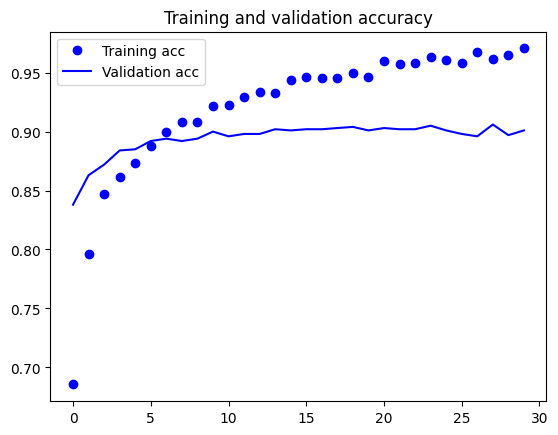

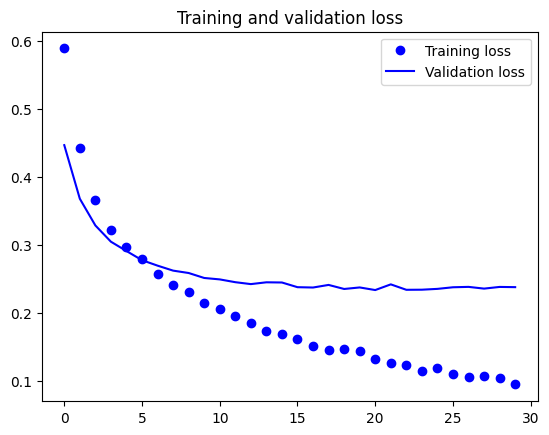

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 약 90%의 검증 정확도에 도달   
- <U>이전 절에서 처음부터 훈련시킨 작은 모델에서 얻은 것보다 훨씬 좋음</U>  
- 하지만 이 그래프는 많은 비율로 드롭아웃을 사용했음에도 불구하고  
훈련이 시작하면서 거의 바로 과대적합(overfitting)되고 있다는 것을 보여줌  
- <font color="red">**작은 이미지 데이터셋에서는  
과대적합을 막기 위해 필수적인  
<U>데이터 증식을 사용하지 않았기 때문</U>임**</font>

**이제 특성 추출을 위해 두 번째로 언급한 방법을 살펴보겠습니다:**  
- 이 방법은 <U>훨씬 느리</U>고 <U>비용이 많이 들</U>지만 <U>훈련하는 동안 데이터 증식 기법 사용가능</U>  
- `conv_base` 모델을 확장하고 입력 데이터를 사용해 <U>엔드 투 엔드 (end-to-end)로 실행</U>함

- 이 기법은 연산 비용이 크기 때문에 GPU를 사용할 수 있을 때 시도해야 함. CPU에서는 적용하기 매우 힘듦

- <font color="blue">**모델은 층과 동일하게 작동하므로 층을 추가하듯이  
 `Sequential` 모델에 (`conv_base` 같은) 다른 모델을 추가할 수 있음**</font>:

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

이 모델의 구조는 다음과 같음:

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

- VGG16의 합성곱 기반층은 14,714,688개의 매우 많은 파라미터를 가지고 있음  
- 합성곱 기반층 위에 추가한 분류기는 2백만 개의 파라미터를 가짐

- **모델을 컴파일하고 훈련하기 전에 <font color="red">합성곱 기반층을 동결</font>하는 것이 아주 중요함**  
- <font color="blue">**하나 이상의 <U>층을 동결(freeze)</U>한다는 것은  
훈련하는 동안 <U>가중치가 업데이트되지 않도록 막는다</U>는 뜻임**</font>  
- <U>이렇게 하지 않으면 합성곱 기반층에 의해 **사전에 학습된 표현이 훈련하는 동안 수정**될 것임</U>  
- 맨 위의 `Dense` 층은 랜덤하게 초기화되었기 때문에 매우 큰 가중치 업데이트 값이 네트워크에 전파될 것임  
- 이는 사전에 학습된 표현을 크게 훼손하게 됨

**케라스에서는 `trainable` 속성을 `False`로 설정하여 네트워크를 동결할 수 있음**:

In [ ]:
conv_base.trainable = False

- **이렇게 설정하면 추가한 두 개의 `Dense` 층의 가중치만 훈련됨**  
- 층마다 두 개씩(가중치 행렬과 편향 벡터) 총 네 개의 텐서가 훈련됨  
- 변경 사항을 적용하려면 먼저 모델을 컴파일해야 함  
- **컴파일 단계 후에 `trainable` 속성을 변경하면 반드시 모델을 다시 컴파일해야 함**  
- 그렇지 않으면 변경 사항이 적용되지 않음

**이제 앞의 예제에서 사용했던 <font color="blue">데이터 증식</font>을 사용하여 모델 훈련을 시작할 수 있음:**

verbose: Integer. 0, 1, or 2.  
0 = silent,  
1 = progress bar,   
2 = one line per epoch.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 - 28s - 282ms/step - acc: 0.7305 - loss: 0.5588 - val_acc: 0.8490 - val_loss: 0.4245
Epoch 2/30
100/100 - 25s - 246ms/step - acc: 0.8340 - loss: 0.4180 - val_acc: 0.8730 - val_loss: 0.3431
Epoch 3/30
100/100 - 24s - 245ms/step - acc: 0.8555 - loss: 0.3605 - val_acc: 0.8820 - val_loss: 0.3077
Epoch 4/30
100/100 - 41s - 407ms/step - acc: 0.8575 - loss: 0.3344 - val_acc: 0.8990 - val_loss: 0.2863
Epoch 5/30
100/100 - 41s - 414ms/step - acc: 0.8665 - loss: 0.3154 - val_acc: 0.8970 - val_loss: 0.2718
Epoch 6/30
100/100 - 24s - 242ms/step - acc: 0.8825 - loss: 0.2966 - val_acc: 0.8970 - val_loss: 0.2634
Epoch 7/30
100/100 - 42s - 421ms/step - acc: 0.8890 - loss: 0.2776 - val_acc: 0.9020 - val_loss: 0.2559
Epoch 8/30
100/100 - 24s - 239ms/step - acc: 0.8870 - loss: 0.2786 - val_acc: 0.9110 - val_loss: 0.2504
Epoch 9/30
100/100 - 24s - 242ms/step - acc: 0.8875 - loss: 0.2641 - val_acc: 0.8990 - val_loss: 0.2503
Epoch 10/30
100/100 - 41s - 406ms/step - acc: 0.8950 - loss: 0.2

In [ ]:
model.save('cats_and_dogs_small_3.keras')

결과 그래프를 다시 그려 봅시다:

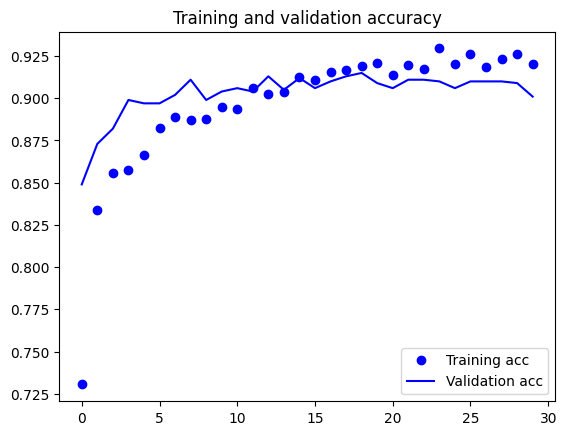

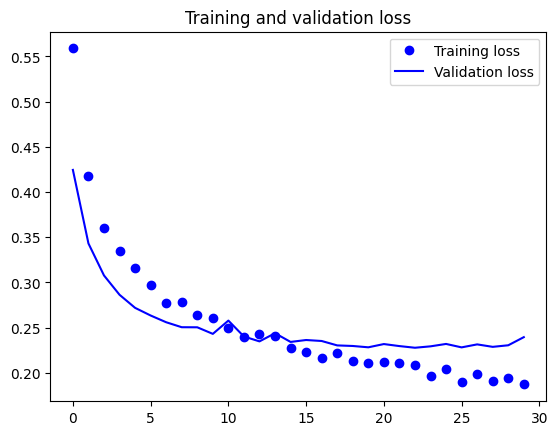

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- <font color="red">**검증 정확도가 이전과 비슷하지만  
처음부터 훈련시킨 소규모 컨브넷보다  
 <U>과대적합이 줄어든 것</U>을 볼 수 있음**</font>

## 미세 조정(fine-tuning)

- <font color="red">모델을 재사용하는 데 널리 사용되는 또 하나의 기법은  
특성 추출을 보완하는 **미세 조정(fine-tuning)**임</font>  
- **Fine-tuning은 특성 추출에 사용했던 동결 모델의 상위 층 몇 개를 동결에서 해제하고  
모델에 새로 추가한 층(여기서는 완전 연결 분류기)과 함께 훈련하는 것임**  
- 주어진 문제에 조금 더 밀접하게 재사용 모델의 표현을 일부 조정하기 때문에 미세 조정이라고 부름



<img src="https://drive.google.com/uc?export=view&id=1rSjKmPDSw1sgOcEdHYy1qKbErXUV88pk" width="400"/>
</div>



- 앞서 랜덤하게 초기화된 상단 분류기를 훈련하기 위해  
VGG16의 <U>합성곱 기반층(conv_base)을 동결</U>해야 한다고 말함  
- 같은 이유로 맨 위에 있는 분류기(classifier)가 훈련된 후에 **합성곱 기반의 상위 층을 미세 조정할 수 있음**  
- 분류기(Classifier)가 미리 훈련되지 않으면 훈련되는 동안 너무 큰 오차 신호가 네트워크에 전파됨  
- 이는 <U>미세 조정될 층들이 사전에 학습한 표현들을 망가뜨리게</U> 될 것임  


**네트워크를 미세 조정(Finetuning)하는 단계는 다음과 같음**:

<font color="blue">**1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가함**  
**2. 기반 네트워크를 동결함**  
**3. 새로 추가한 네트워크를 훈련함**  
**4. 기반 네트워크에서 일부 층의 동결을 해제함**  
**5. <U>동결을 해제한 층과 새로 추가한 층을 함께 훈련</U>함</font>**

- 처음 세 단계는 특성 추출을 할 때 이미 완료함  
- 네 번째 단계를 진행를 진행하면  
 `conv_base`의 동결을 해제하고 개별 층을 동결함  

기억을 되살리기 위해 합성곱 기반층의 구조를 다시 확인해 보겠습니다:

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

- 마지막 세 개의 합성곱 층을 미세 조정함  
:즉, `block4_pool`까지 모든 층은 동결되고 `block5_conv1`, `block5_conv2`, `block5_conv3` 층은 학습 대상이 됨.

**Q: 왜 더 많은 층을 미세 조정하지 않을까요?  
왜 전체 합성곱 기반층을 미세 조정하지 않을까요?  
A: 그렇게 할 수도 있지만 다음 사항을 고려해야 함:**

* 합성곱 기반층에 있는 **하위 층들은 좀 더 일반적이고 재사용 가능한 특성들을 인코딩함**   
반면 <U>**상위 층은 좀 더 특화된 특성**</U>을 인코딩함  
 **새로운 문제에 재활용하도록 수정이 필요한 것은 구체적인 특성**이므로  
 이들을 미세 조정하는 것이 유리함  
하위 층으로 갈수록 미세 조정에 대한 효과가 감소함
* <font color="blue">**훈련해야 할 파라미터가 많을수록 과대적합의 위험이 커짐**</font>  
합성곱 기반층은 1천 5백만 개의 파라미터를 가지고 있음  
작은 데이터셋으로 전부 훈련하려고 하면 매우 위험함

그러므로 <font color="blue">**이런 상황에서는 합성곱 기반층에서 최상위 두 세개의 층만 미세 조정하는 것이 좋음**</font>  
: **데이터 양이 많다면 전체 network을 fine-tuning하는 것이 좋음**.

앞선 예제 코드에 이어서 미세 조정을 설정해보죠:

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

**이제 네트워크의 미세 조정을 시작:**  
- <font color="blue">**<U>학습률을 낮춘 RMSProp 옵티마이저를 사용</U>함**</font>  
- 학습률을 낮추는 이유는 미세 조정하는 세 개의 층에서 학습된 표현을 조금씩 수정하기 위해서임  
- 변경량이 너무 크면 학습된 표현에 나쁜 영향을 끼칠 수 있음


미세 조정을 진행해 보죠:

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 31s 258ms/step - acc: 0.9205 - loss: 0.1946 - val_acc: 0.9060 - val_loss: 0.2176
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 277ms/step - acc: 0.9405 - loss: 0.1440 - val_acc: 0.9160 - val_loss: 0.2103
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 258ms/step - acc: 0.9384 - loss: 0.1525 - val_acc: 0.9240 - val_loss: 0.2107
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 241ms/step - acc: 0.9531 - loss: 0.1211 - val_acc: 0.9120 - val_loss: 0.2461
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 249ms/step - acc: 0.9556 - loss: 0.1064 - val_acc: 0.9120 - val_loss: 0.2228
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 248ms/step - acc: 0.9641 - loss: 0.0919 - val_acc: 0.9290 - val_loss: 0.2001
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 247ms/step - acc: 0.9684 - loss: 0.0975 - val_acc: 0.9200 - val_loss: 0.2221
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 256ms/step - acc: 0.9747 - loss: 0.0683 - val_acc: 0.9300 - val_loss: 0.1986
Epoch 9/100
100/100 ━━━━

In [ ]:
model.save('cats_and_dogs_small_4.keras')

이전과 동일한 코드로 결과 그래프를 그려 보겠습니다:

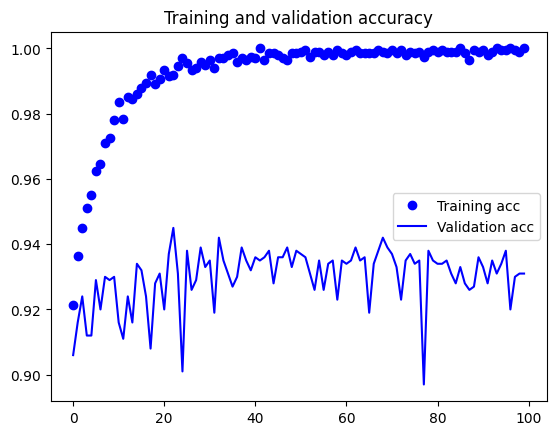

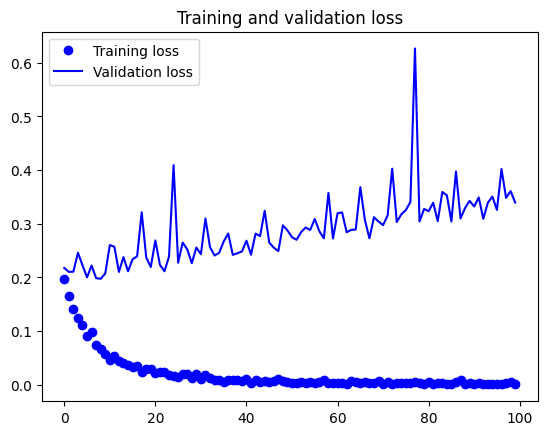

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 그래프가 불규칙하게 보임  
- 그래프를 보기 쉽게하기 위해 지수 이동 평균으로 정확도와 손실 값을 부드럽게 표현할 수 있음   

다음은 지수 이동 평균을 구하기 위한 간단한 함수임:

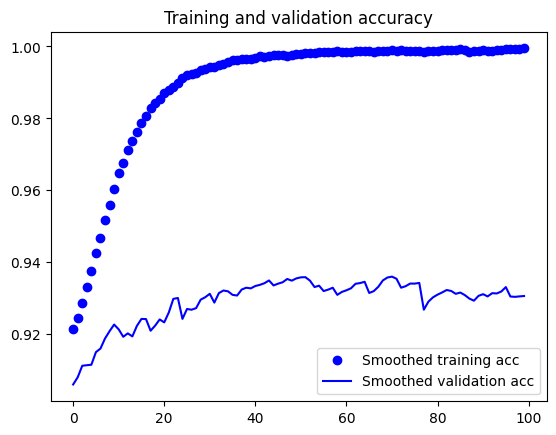

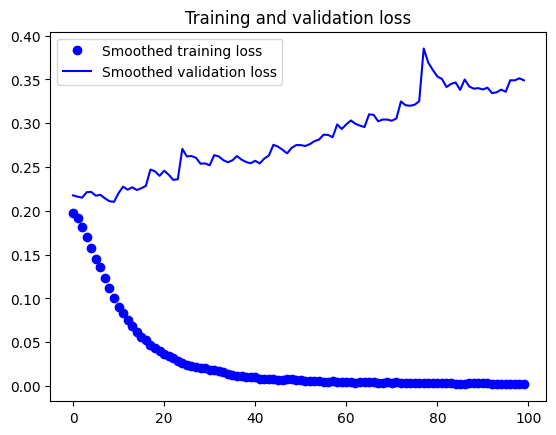

In [ ]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- 검증 정확도 곡선이 훨씬 깨끗하게 보임
- 정확도가 확실히 1% 이상 향상됨



- 손실 곡선은 실제 어떤 향상을 얻지 못함(사실 악화됨).  
- <font color="blue">**Q: 손실히 감소되지 않았는데 어떻게 정확도가 안정되거나 향상될 수 있을까요?**</font>  
- 답은 간단합니다. **그래프는 개별적인 손실 값의 평균을 그린 것임**  
<U>**하지만 정확도에 영향을 미치는 것은 손실 값의 분포이지 평균이 아님**</U>  
정확도는 모델이 예측한 클래스 확률이 어떤 임계값을 넘었는지에 대한 결과이기 때문임  
 **모델이 더 향상되더라도 평균 손실에 반영되지 않을 수 있음**

이제 마지막으로 테스트 데이터에서 이 모델을 평가하겠습니다:

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - acc: 0.9408 - loss: 0.3378
Test Accuracy: 0.9390000104904175
Test Loss: 0.35468170046806335


- 92%의 테스트 정확도를 얻음  
- 이 데이터셋을 사용한 원래 캐글 경연 대회에서 꽤 높은 순위임  
- 하지만 최신 딥러닝 기법으로 훈련 데이터의 일부분(약 10%)만을 사용해서 이런 결과를 달성함  
- 20,000개의 샘플에서 훈련하는 것과 2,000개의 샘플에서 훈련하는 것 사이에는 아주 큰 차이점이 있음

## 정리


* CNN은 컴퓨터 비전 작업에 가장 뛰어난 머신 러닝 모델임  
아주 작은 데이터셋에서도 처음부터 훈련해서 괜찮은 성능을 낼 수 있음  
* 작은 데이터셋에서는 과대적합이 큰 문제임   
 **데이터 증식**은 이미지 데이터를 다룰 때 과대적합을 막을 수 있는 강력한 방법임
* **Feature Extractor:** 특성 추출 방식으로 새로운 데이터셋에 기존의 컨브넷을 쉽게 재사용할 수 있음  
작은 이미지 데이터셋으로 작업할 때 효과적인 기법임
* **Finetuning:** 특성 추출(feature extraction)을 보완하기 위해 fine-tuning을 사용할 수 있음  
 Fine-tuning은 기존 모델에서 사전에 학습한 표현의 일부를 새로운 문제에 적응시킴.  
 이 기법은 조금 더 성능을 끌어올릴 수 있음.
